<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-28(ms_admission).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']


In [0]:
data = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
data.head()
#data['University Rating'].value_counts()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
data = data.drop('Serial No.',axis=1)

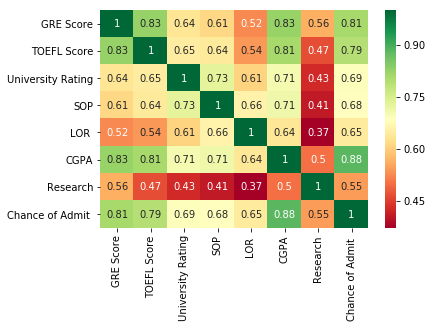

<Figure size 720x720 with 0 Axes>

In [0]:
sn.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.figure(figsize=(10,10))
plt.show()

In [0]:
gre_above_315 = data.loc[data['GRE Score']>=315]
gre_above_315.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90


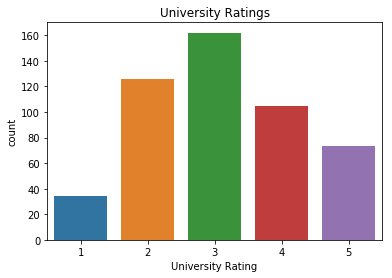

In [0]:
sn.countplot(data['University Rating'])
plt.title('University Ratings')
plt.show()

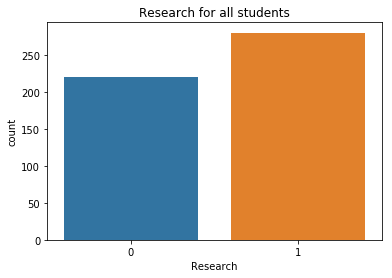

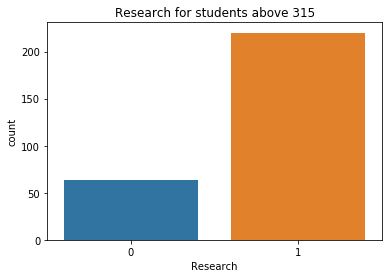

In [0]:
plt.title('Research for all students')
sn.countplot(data['Research'])
plt.show()
plt.title('Research for students above 315')
sn.countplot(gre_above_315['Research'])
plt.show()

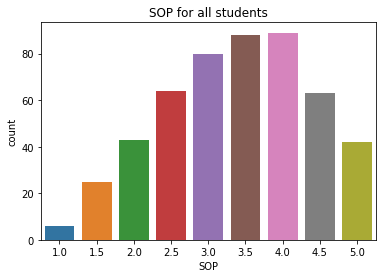

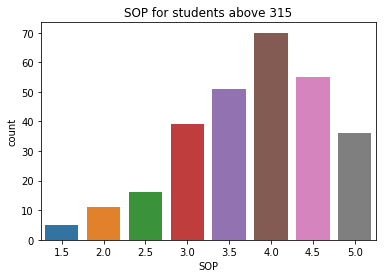

In [0]:
plt.title('SOP for all students')
sn.countplot(data['SOP'])
plt.show()
plt.title('SOP for students above 315')
sn.countplot(gre_above_315['SOP'])
plt.show()

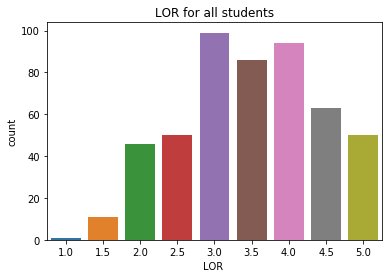

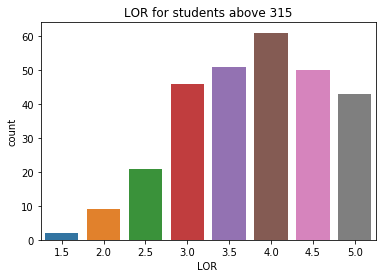

In [0]:
# LOR is written with a space, please type data.columns to see the names of columns written properly
plt.title('LOR for all students')
sn.countplot(data['LOR '])
plt.show()
plt.title('LOR for students above 315')
sn.countplot(gre_above_315['LOR '])
plt.show()

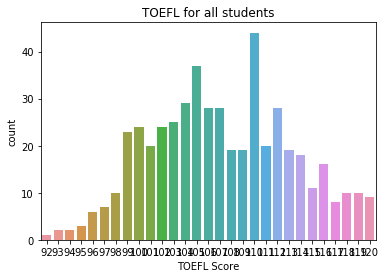

<Figure size 1008x720 with 0 Axes>

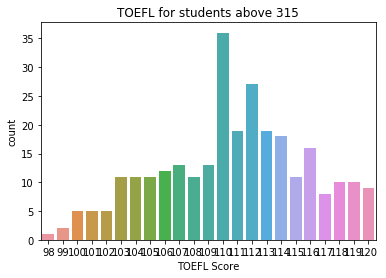

<Figure size 1008x720 with 0 Axes>

In [0]:
# kaggle kernel has no use of writing figsize. The output figure size remains the same in the output. 
plt.title('TOEFL for all students')
sn.countplot(data['TOEFL Score'])
plt.figure(figsize=(14,10))
plt.show()
plt.title('TOEFL for students above 315')
sn.countplot(gre_above_315['TOEFL Score'])
plt.figure(figsize=(14,10))
plt.show()

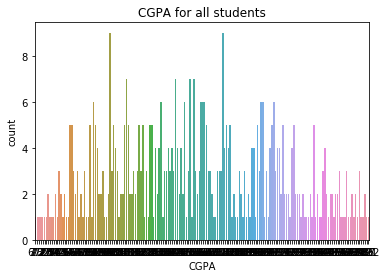

<Figure size 1008x720 with 0 Axes>

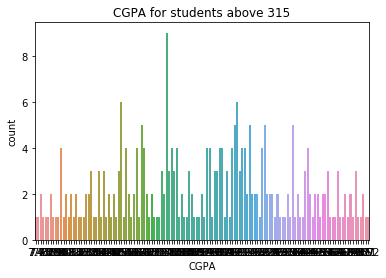

<Figure size 1008x720 with 0 Axes>

In [0]:
plt.title('CGPA for all students')
sn.countplot(data['CGPA'])
plt.figure(figsize=(14,10))
plt.show()
plt.title('CGPA for students above 315')
sn.countplot(gre_above_315['CGPA'])
plt.figure(figsize=(14,10))
plt.show()

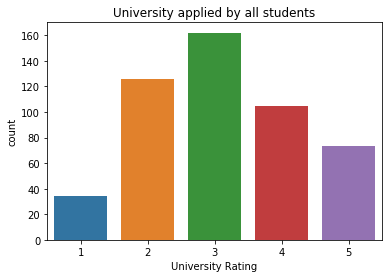

<Figure size 1008x720 with 0 Axes>

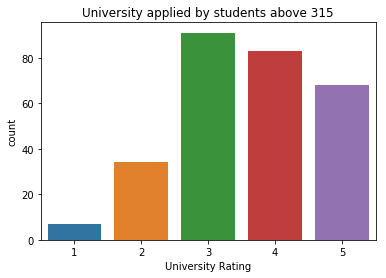

<Figure size 1008x720 with 0 Axes>

In [0]:
plt.title('University applied by all students')
sn.countplot(data['University Rating'])
plt.figure(figsize=(14,10))
plt.show()
plt.title('University applied by students above 315')
sn.countplot(gre_above_315['University Rating'])
plt.figure(figsize=(14,10))
plt.show()

In [0]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [0]:
features = data.iloc[:,:7]
labels = data.iloc[:,-1]

In [0]:
# CONSIDERING THE MOST HIGHLY OUTCOMES SO THAT MAXIMUM ARE SELECTED FOR MS
labels[labels > 0.6] = 1
labels[labels < 0.6] = 0
labels.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Chance of Admit , dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size=0.35,random_state=0)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(325, 7)
(325,)
(175, 7)
(175,)


In [0]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print('Training accuracy Score:',np.mean(Y_test == y_pred)*100)


Training accuracy Score: 85.14285714285714


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
data_verify = pd.read_csv('../input/Admission_Predict.csv')
data_verify.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
X_t = data_verify.iloc[:,:7]
Y_t = data_verify.iloc[:,-1]
Y_t[Y_t > 0.6] = 1
Y_t[Y_t < 0.6] = 0
y_test_pred = clf.predict(X_t)
print('Test Accuracy:',np.mean(Y_t == y_test_pred)*100)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Test Accuracy: 81.5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
